# Team: Apex_Legends

## Members:

| Name | Registration Number | Roll Number |
|-----------|-----------|-----------|
| Dinesh Kumar Majhi | 12306254 | RQ2355A15 |
| Abhishek Shivhare | 12306295 | RQ2355A16 |
| Kundan Popandiya | 12314315 | RQ2355A05 |
| Harsh Singh | 12314570 | RQ2355A06 |
| Anand Kumar Azad | 12307577 | RQ2355A14 |
| Sagar Behera | 12309428 | RQ2355A19 |
| Bharath Bondalapati | 12314287 | RQ2355B76 |

## You can find the dataset from the link below:
[Kaggle](https://www.kaggle.com/datasets/shashwatwork/impact-of-covid19-pandemic-on-the-global-economy/data?select=raw_data.csv)

# About Dataset
#### Content
#### Data for 210 countries with respect to the impact of covid-19 on the global economy

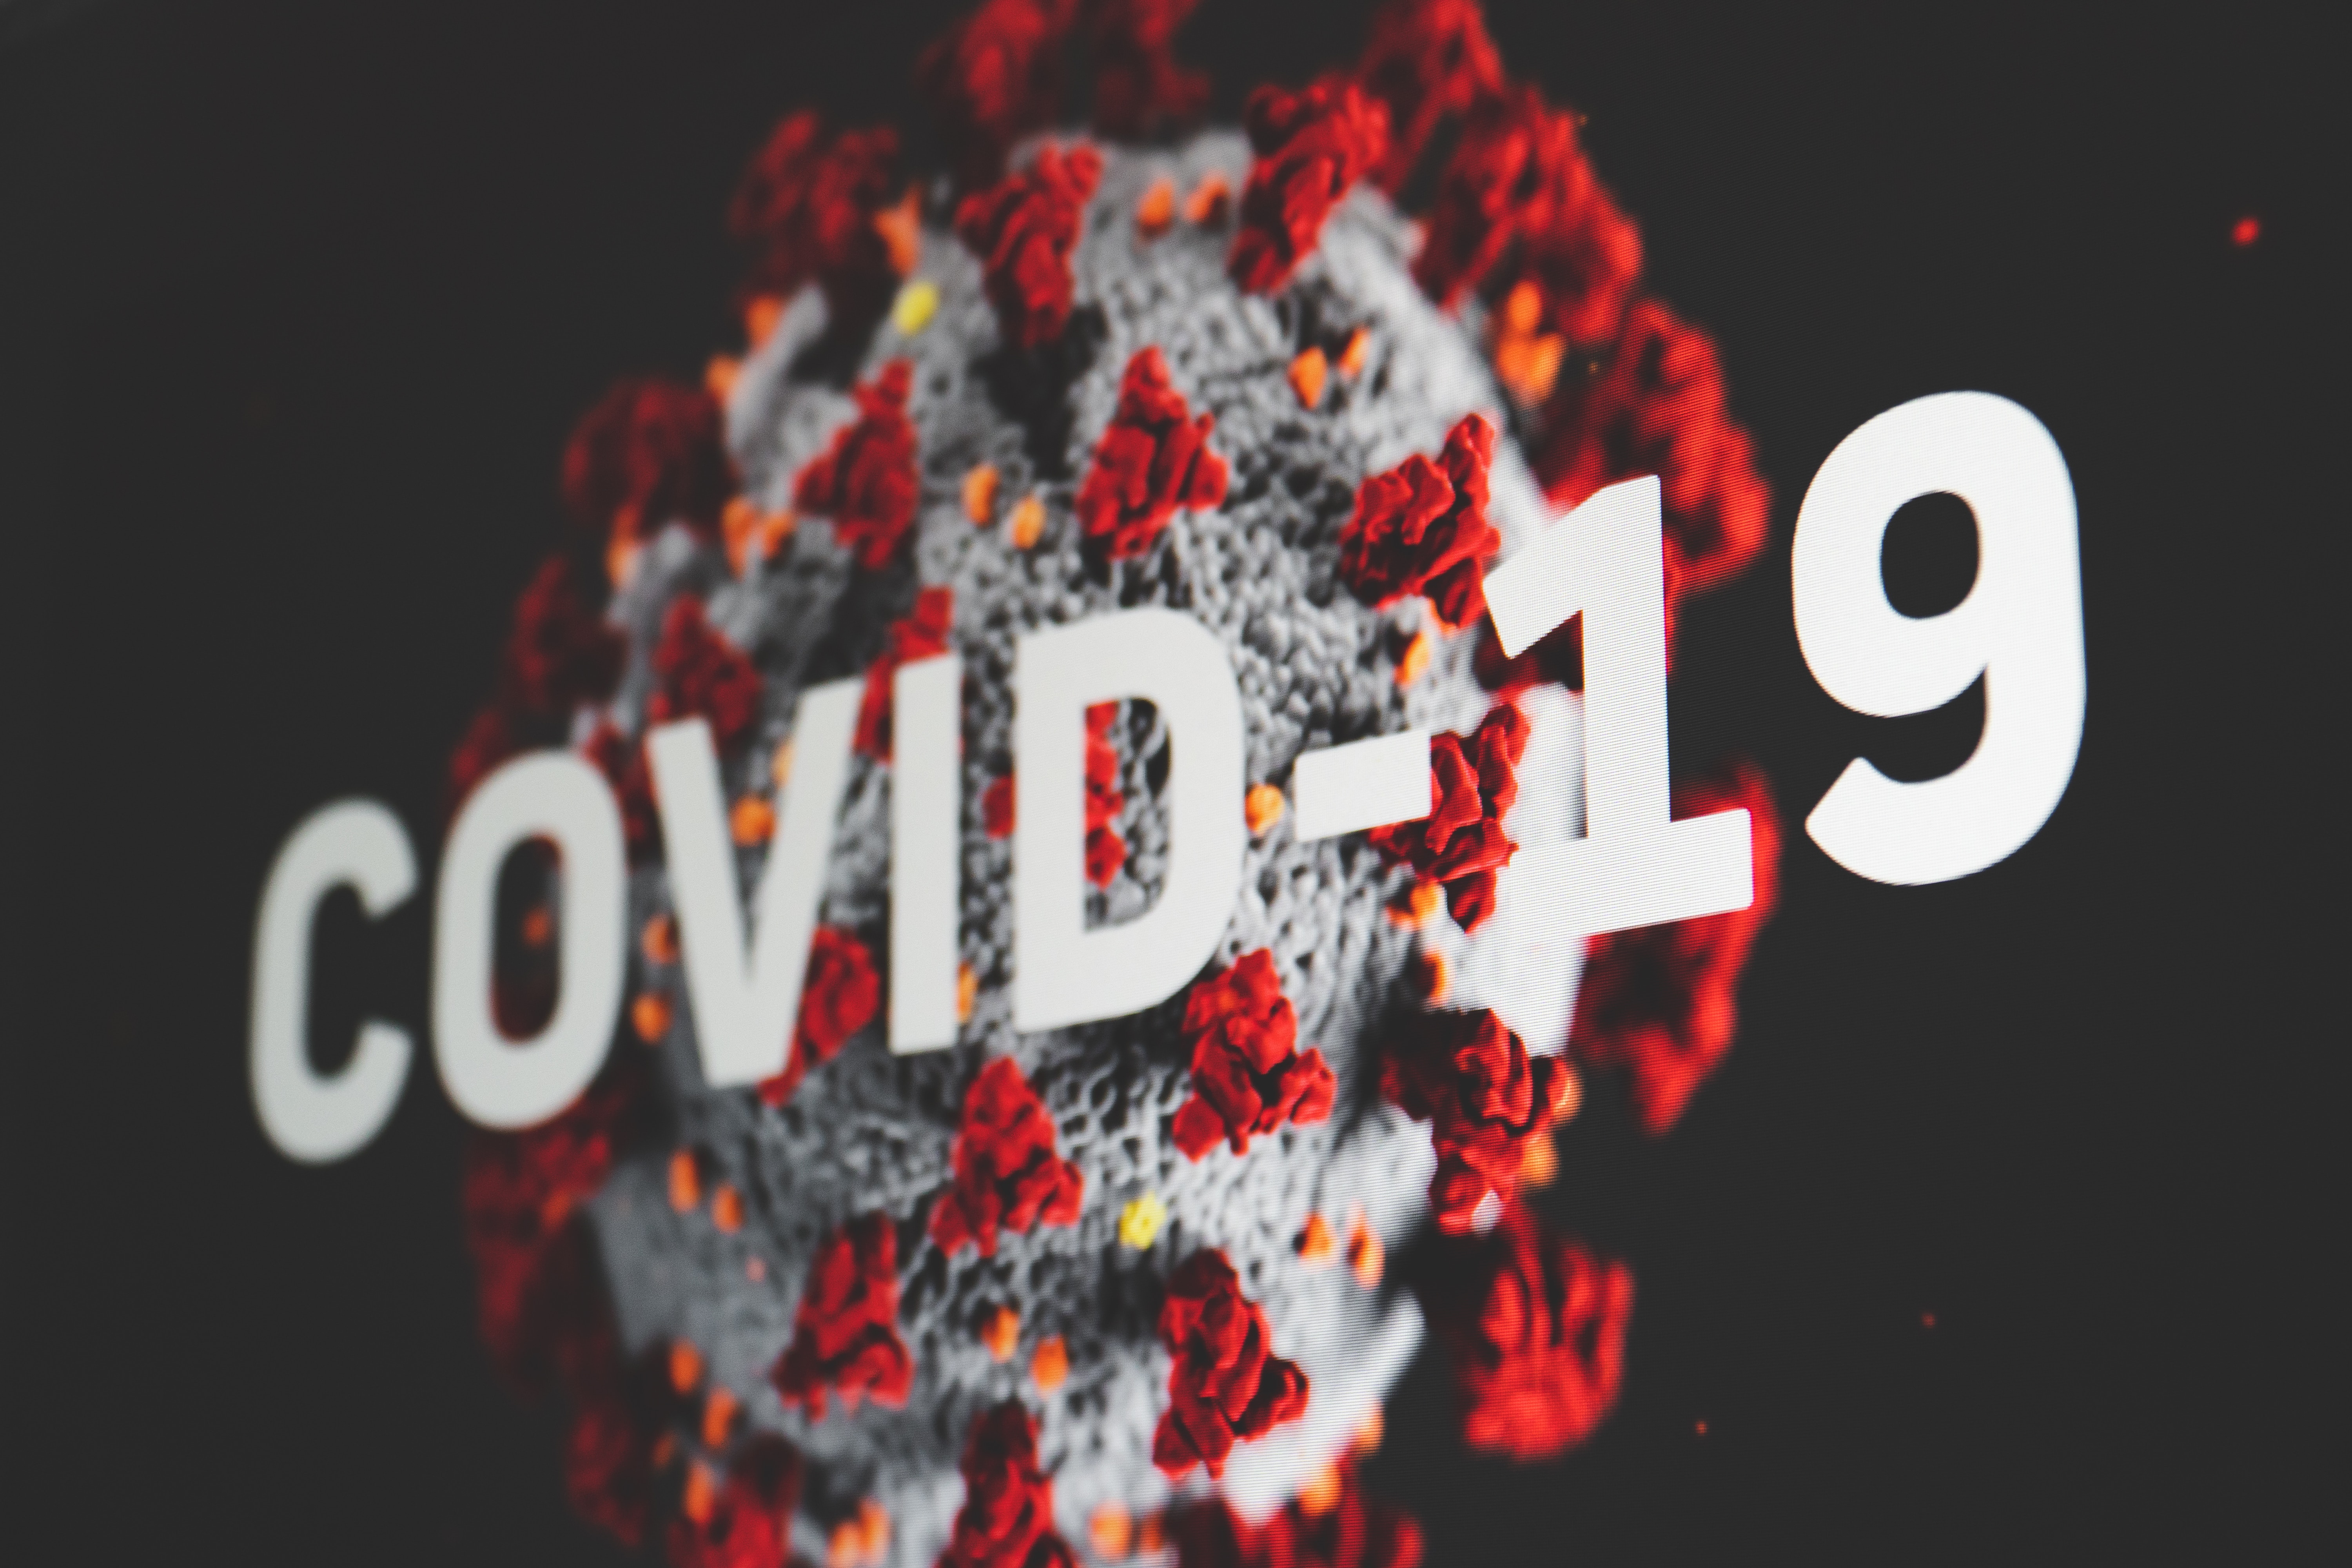

In [ ]:
from IPython.display import display, Image
display(Image(filename='/content/drive/My Drive/DatasetCapstone/c2.jpg'))

# Impact of Covid-19 Pandemic on the Global level

### The outbreak of Covid-19 has led to many restrictions that have had a major impact on the global economy. Almost all countries were negatively affected by the increase in Covid-19 cases. The first wave of Covid-19 affected the global economy as the world was not prepared to prevent the epidemic. It causes the economy to slow down by increasing the number of patients, increasing death rates, increasing unemployment and increasing poverty.

### Let's import necessary libraries to go down with our analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Now loading the data into a dataframe which is stored on local host:

In [ ]:
data = pd.read_csv("/content/drive/My Drive/DatasetCapstone/raw_data.csv")
data.head(5)

iso_code     location        date  total_cases  total_deaths  \
0      AFG  Afghanistan  2019-12-31          0.0           0.0   
1      AFG  Afghanistan  2020-01-01          0.0           0.0   
2      AFG  Afghanistan  2020-01-02          0.0           0.0   
3      AFG  Afghanistan  2020-01-03          0.0           0.0   
4      AFG  Afghanistan  2020-01-04          0.0           0.0   

   stringency_index  population  gdp_per_capita  human_development_index  \
0               0.0    38928341        1803.987                    0.498   
1               0.0    38928341        1803.987                    0.498   
2               0.0    38928341        1803.987                    0.498   
3               0.0    38928341        1803.987                    0.498   
4               0.0    38928341        1803.987                    0.498   

  Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12  Unnamed: 13  
0      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
1      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
2      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
3      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
4      #NUM!       #NUM!       #NUM!    17.477233  7.497754494

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

In [ ]:
data.columns.tolist()

['iso_code',
 'location',
 'date',
 'total_cases',
 'total_deaths',
 'stringency_index',
 'population',
 'gdp_per_capita',
 'human_development_index',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13']

### We can see some of the non relevant columns which are not essential for further analysis, so we need to transform the data.

### Let's delete the columns:

In [ ]:
data.drop(columns = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], inplace = True)

In [ ]:
data.columns.tolist()

['iso_code',
 'location',
 'date',
 'total_cases',
 'total_deaths',
 'stringency_index',
 'population',
 'gdp_per_capita',
 'human_development_index']

### Now, we can see that the columns that defined have been deleted from the above observation.

### Do we have null values?
Lets check:

In [ ]:
data.isna().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
dtype: int64

### Let's visualize null value presence using a heatmap:

<Axes: >

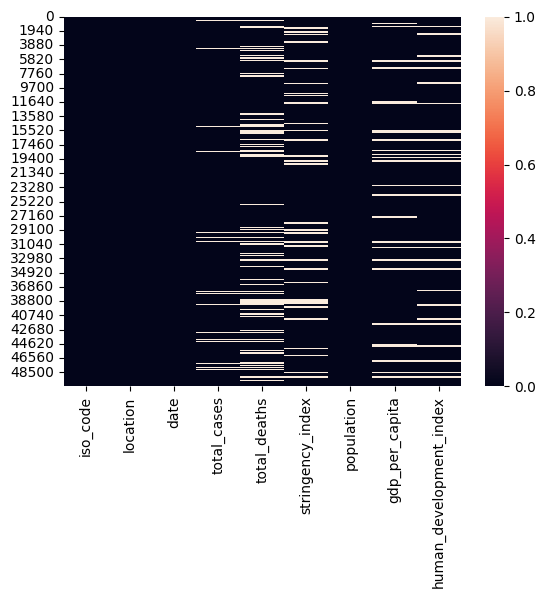

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull())

### What it the percentage of null values?
### We can find it using mean function and some extra calculation.

In [ ]:
(data.isna().mean() * 100).round(2)

iso_code                    0.00
location                    0.00
date                        0.00
total_cases                 6.14
total_deaths               22.19
stringency_index           14.13
population                  0.00
gdp_per_capita             11.33
human_development_index    12.30
dtype: float64

### Let's plot the null percentage in each columns

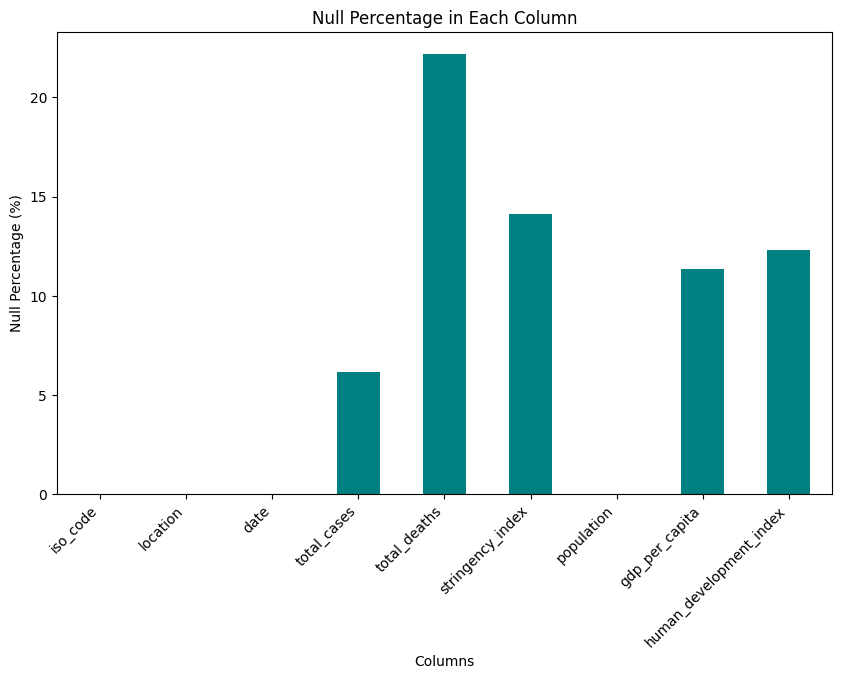

In [ ]:
plt.figure(figsize=(10, 6))
(data.isna().mean() * 100).round(2).plot(kind='bar', color='teal')
plt.title('Null Percentage in Each Column')
plt.xlabel('Columns')
plt.ylabel('Null Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that there are null values available in columns like:
1. total_cases:                6.14%
2. total_deaths:               22.19%
3. stringency_index:           14.13%
4. gdp_per_capita:             11.33%
5. human_development_index:    12.30%

### Now lets fill the null values with the mean to normalize the data

In [ ]:
#Selecting only numeric columns
numeric_columns = data.select_dtypes(include='number')

#Excluding columns where all values are null
numeric_columns = numeric_columns.dropna(axis=1, how='all')

#Replacing null values with the mean of each numeric column
data[numeric_columns.columns] = data[numeric_columns.columns].apply(lambda col: col.fillna(col.mean()))

In [ ]:
data.isna().mean()

iso_code                   0.0
location                   0.0
date                       0.0
total_cases                0.0
total_deaths               0.0
stringency_index           0.0
population                 0.0
gdp_per_capita             0.0
human_development_index    0.0
dtype: float64

### Now you can see that the null percentage have come down to '0.0' for all the columns.

<ipython-input-20-e3cf2d401fde>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_deaths'], fit=None)


<Axes: xlabel='total_deaths', ylabel='Density'>

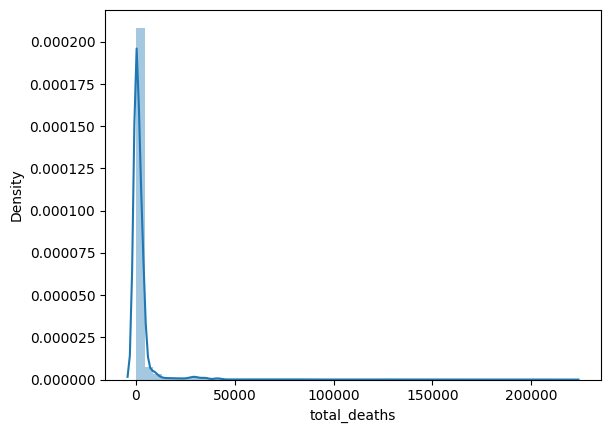

In [ ]:
sns.distplot(data['total_deaths'], fit=None)

<Axes: xlabel='total_deaths'>

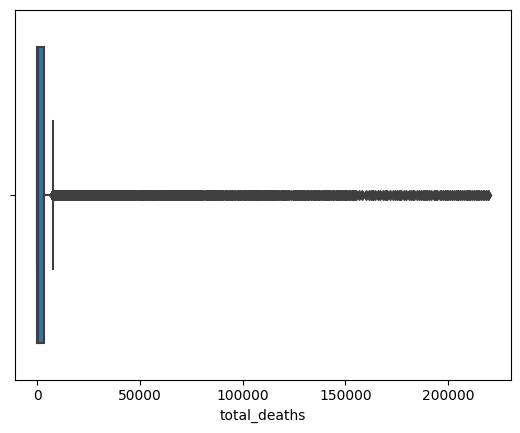

In [ ]:
sns.boxplot(data = data, x='total_deaths')

In [ ]:
print("Upper Limit: ", (data['total_deaths'].quantile(0.75) + data['total_deaths'].quantile(0.25)) + 1.5*data['total_deaths'].std())
print("Upper Limit: ", (data['total_deaths'].quantile(0.75) + data['total_deaths'].quantile(0.25)) - 1.5*data['total_deaths'].std())

Upper Limit:  21304.14268855521
Upper Limit:  -15310.607050745482


In [ ]:
#data.loc[data['total_deaths'] > 21304 ,'total_deaths'] = 21304

### The heatmap below also shows that it's null free.

<Axes: >

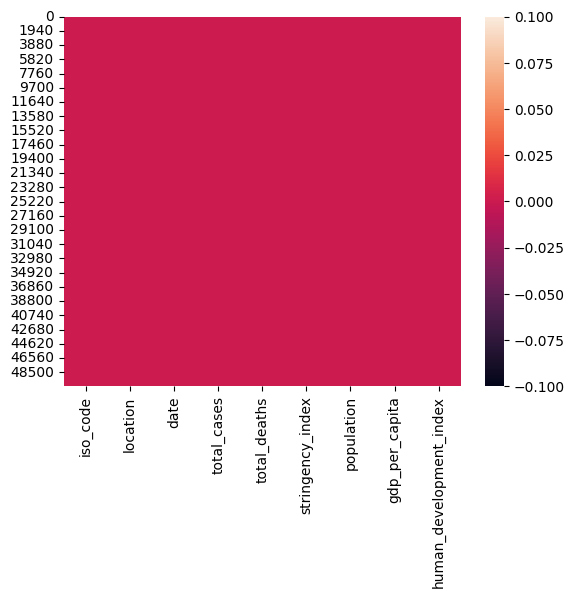

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.isna()

iso_code  location   date  total_cases  total_deaths  stringency_index  \
0         False     False  False        False         False             False   
1         False     False  False        False         False             False   
2         False     False  False        False         False             False   
3         False     False  False        False         False             False   
4         False     False  False        False         False             False   
...         ...       ...    ...          ...           ...               ...   
50413     False     False  False        False         False             False   
50414     False     False  False        False         False             False   
50415     False     False  False        False         False             False   
50416     False     False  False        False         False             False   
50417     False     False  False        False         False             False   

       population  gdp_per_capita  human_development_index  
0           False           False                    False  
1           False           False                    False  
2           False           False                    False  
3           False           False                    False  
4           False           False                    False  
...           ...             ...                      ...  
50413       False           False                    False  
50414       False           False                    False  
50415       False           False                    False  
50416       False           False                    False  
50417       False           False                    False  

[50418 rows x 9 columns]

In [ ]:
data.describe()

total_cases  total_deaths  stringency_index    population  \
count     50418.00      50418.00          50418.00      50418.00   
mean      66219.27       2978.77             56.16   42516010.27   
std      391948.14      12204.92             25.51  156460694.79   
min           0.00          0.00              0.00        809.00   
25%         148.00         18.00             41.67    1399491.00   
50%        2057.50        200.00             56.16    8278737.00   
75%       28710.75       2978.77             76.39   29136808.00   
max     8154595.00     219674.00            100.00 1439323774.00   

       gdp_per_capita  human_development_index  
count        50418.00                 50418.00  
mean         20818.71                     0.72  
std          19248.61                     0.15  
min            661.24                     0.00  
25%           6253.10                     0.64  
50%          16409.29                     0.72  
75%          27936.90                     0.82  
max         116935.60                     0.95

### The above shows the statistics of the data for each column

# Questions that can occur:

In [ ]:
print("Total number of countries in the dataset:",data['location'].nunique())

Total number of countries in the dataset: 210


## Question 1: How many covid-19 cases occured per country?

In [ ]:
#Formatting the exponential values to exact figure
pd.options.display.float_format = '{:.2f}'.format

total_cases_detected = data.groupby('location')['total_cases'].sum()
total_cases_detected

location
Afghanistan   5126433.00
Albania       1071951.00
Algeria       8999594.03
Andorra        620891.65
Angola         304005.00
                 ...    
Venezuela     4906053.27
Vietnam       1976757.69
Yemen          228925.00
Zambia        1129913.00
Zimbabwe       593699.00
Name: total_cases, Length: 210, dtype: float64

## Question 2: What are the top 10 countries with case counts?

In [ ]:
data.groupby('location')['total_cases'].sum().nlargest(10)

location
United States    747404702.77
Brazil           429479015.66
India            409824412.52
Russia           135007967.79
Spain             75836692.79
Peru              75478668.47
Mexico            75274617.85
South Africa      65014237.24
United Kingdom    61594048.79
Colombia          60940997.65
Name: total_cases, dtype: float64

### Visualize

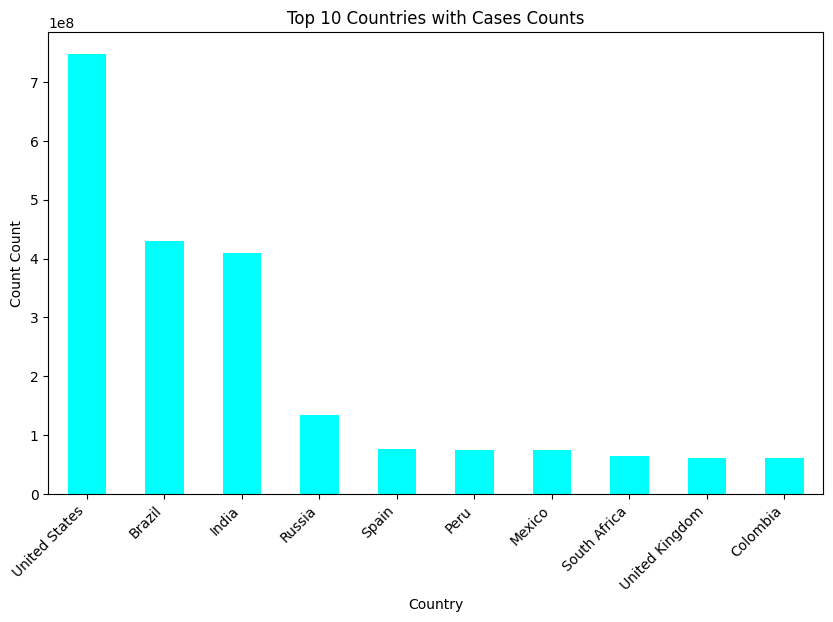

In [ ]:
plt.figure(figsize=(10, 6))
data.groupby('location')['total_cases'].sum().nlargest(10).plot(kind='bar', color='aqua')
plt.title('Top 10 Countries with Cases Counts')
plt.xlabel('Country')
plt.ylabel('Count Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Question 3: What are the top 10 countries with death counts?

In [ ]:
data.groupby('location')['total_deaths'].sum().nlargest(10)

location
United States    26659278.84
Brazil           14572910.89
Mexico            7537130.19
India             7464777.05
United Kingdom    7449150.44
Italy             6664225.00
France            5770467.32
Spain             5704243.91
Peru              3082592.12
Iran              3065987.16
Name: total_deaths, dtype: float64

### Visualization

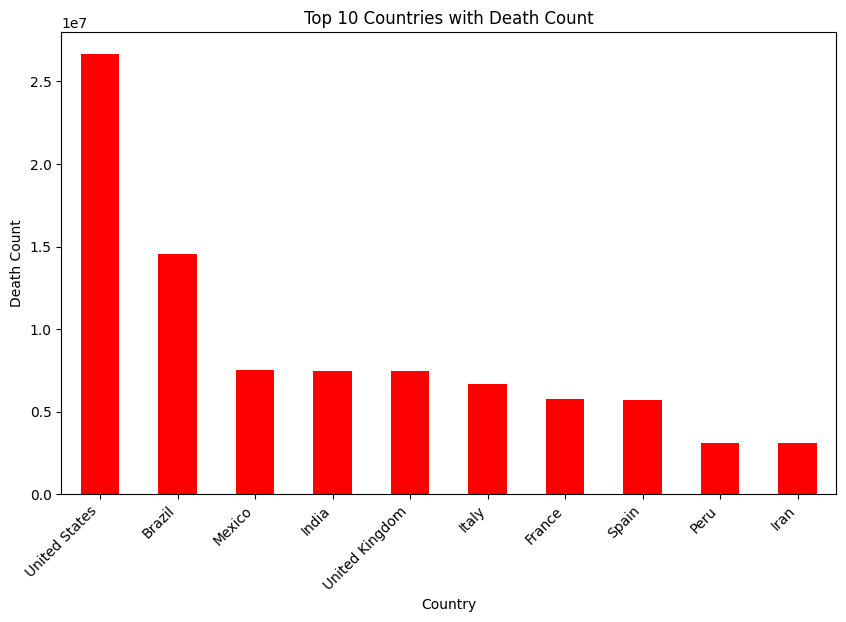

In [ ]:
plt.figure(figsize=(10, 6))
data.groupby('location')['total_deaths'].sum().nlargest(10).plot(kind='bar', color='red')
plt.title('Top 10 Countries with Death Count')
plt.xlabel('Country')
plt.ylabel('Death Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Question 4: What are the top 10 countries with the stingency index?
## What is Stringency Index?
It is among the metrics being used by the Oxford COVID-19 Government Response Tracker.
The Tracker involves a team of 100 Oxford community members who have continuously updated a database of 17 indicators of government response.
These indicators examine containment policies such as school and workplace closings, public events, public transport, stay-at-home policies.
A higher index score indicates a higher level of stringency.

In [ ]:
data.groupby('location')['stringency_index'].sum().nlargest(10)

location
Honduras    20373.74
Iraq        20358.28
China       20302.65
Argentina   19804.90
Oman        19791.36
Libya       19759.23
Nepal       19572.02
Guatemala   19509.24
Bolivia     19426.01
Peru        19380.47
Name: stringency_index, dtype: float64

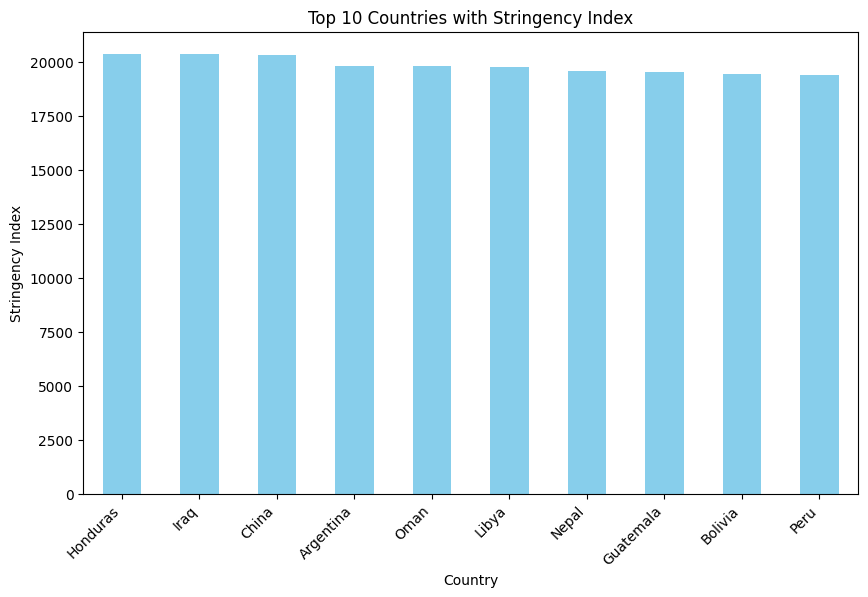

In [ ]:
plt.figure(figsize=(10, 6))
data.groupby('location')['stringency_index'].sum().nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Stringency Index')
plt.xlabel('Country')
plt.ylabel('Stringency Index')
plt.xticks(rotation=45, ha='right')
plt.show()

# Question 5: What are the top 10 countries with GDP per capita?

In [ ]:
data.groupby('location')['gdp_per_capita'].sum().nlargest(10)

location
Qatar                   3.437907e+07
Luxembourg              2.771772e+07
Singapore               2.514740e+07
Ireland                 1.979658e+07
United Arab Emirates    1.978428e+07
Kuwait                  1.926598e+07
Norway                  1.905122e+07
Switzerland             1.687859e+07
San Marino              1.671727e+07
Brunei                  1.601346e+07
Name: gdp_per_capita, dtype: float64

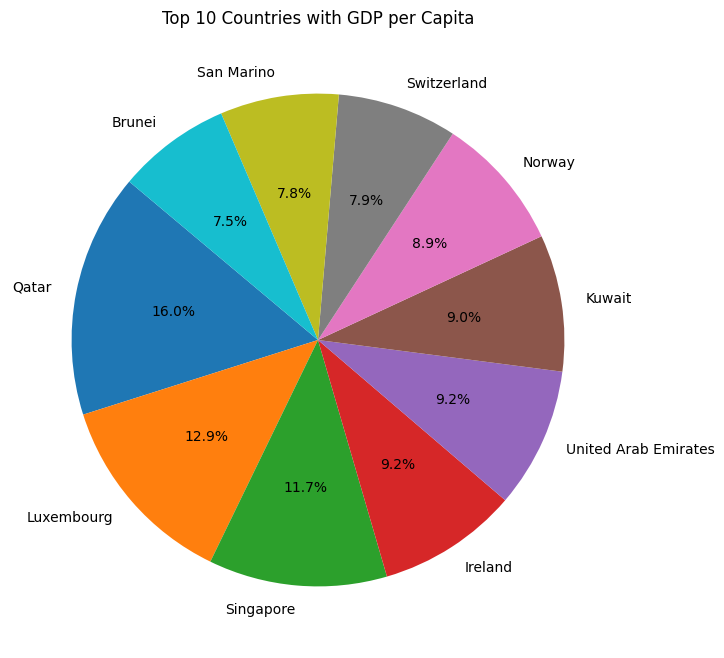

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(data.groupby('location')['gdp_per_capita'].sum().nlargest(10), labels=data.groupby('location')['gdp_per_capita'].sum().nlargest(10).index, autopct='%1.1f%%', startangle=140)
plt.title(f"Top 10 Countries with GDP per Capita")
plt.show()

# Question 6: On which date India had the most and least death counts?

In [ ]:
# Filter data for India and then group by date and sum total deaths
india_total_deaths = data[data['location'] == 'India'].groupby('date')['total_deaths'].sum()

# Find the date with the highest total deaths in India
date_highest_deaths = india_total_deaths.idxmax()

print(f"Date with the highest total deaths in India: {date_highest_deaths}")
print(f"Total deaths on that date: {india_total_deaths.max()}")

Date with the highest total deaths in India: 2020-10-19
Total deaths on that date: 114610.0


In [ ]:
# Filter data for India and then group by date and sum total deaths
india_total_deaths = data[data['iso_code'] == 'IND'].groupby('date')['total_deaths'].sum()

# Find the date with the highest total deaths in India
date_lowest_deaths = india_total_deaths.idxmin()

print(f"Date with the least total deaths in India: {date_lowest_deaths}")
print(f"Total deaths on that date: {india_total_deaths.min()}")

Date with the least total deaths in India: 2020-03-13
Total deaths on that date: 1.0


# Question 7: Average case counts per country (Top 10)

In [ ]:
data.groupby('location')['total_cases'].mean().nlargest(10)

location
United States   2542192.87
Brazil          1460812.98
India           1393960.59
Russia           459210.77
Peru             321185.82
Colombia         266117.89
Spain            258828.30
Mexico           256036.12
South Africa     253961.86
Chile            223877.88
Name: total_cases, dtype: float64

# Question 8: Average death counts per country (Top 10)

In [ ]:
data.groupby('location')['total_deaths'].mean().nlargest(10)

location
United States    90677.82
Brazil           49567.72
Mexico           25636.50
India            25390.40
United Kingdom   25337.25
Italy            22667.43
France           19627.44
Spain            19468.41
Peru             13117.41
Iran             10428.53
Name: total_deaths, dtype: float64

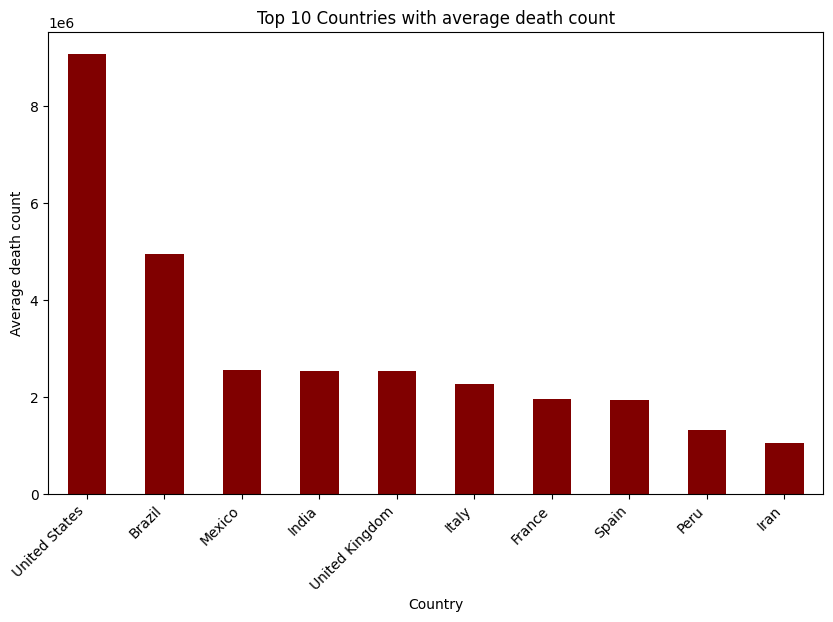

In [ ]:
plt.figure(figsize=(10, 6))
(data.groupby('location')['total_deaths'].mean()*100).round(2).nlargest(10).plot(kind='bar', color='maroon')


plt.title('Top 10 Countries with average death count')
plt.xlabel('Country')
plt.ylabel('Average death count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Question 9 : Which countries have maximum human development index (Top 10).
### The Human Development Index (HDI) is a statistical tool that measures a country's social and economic development. It measures a country's average achievements in three dimensions of human development:
1. Health
2. Knowledge
3. Standard of living

In [ ]:
(data.groupby('location')['human_development_index'].mean()*100).round(2).nlargest(10)

location
Norway        95.30
Switzerland   94.40
Australia     93.90
Ireland       93.80
Germany       93.60
Iceland       93.50
Hong Kong     93.30
Sweden        93.30
Singapore     93.20
Netherlands   93.10
Name: human_development_index, dtype: float64

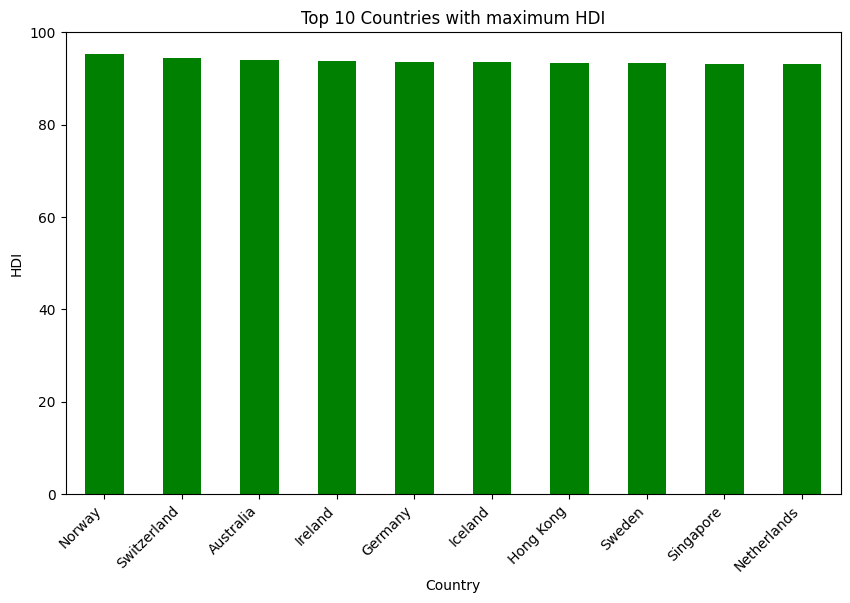

In [ ]:
plt.figure(figsize=(10, 6))
(data.groupby('location')['human_development_index'].mean()*100).round(2).nlargest(10).plot(kind='bar', color='green')
plt.title('Top 10 Countries with maximum HDI')
plt.xlabel('Country')
plt.ylabel('HDI')
plt.xticks(rotation=45, ha='right')
plt.show()

# Question 10: What is the average GDP per Capita? Show top 10 countries.

In [ ]:
data.groupby('location')['gdp_per_capita'].mean().nlargest(10)

location
Qatar                   116935.600
Luxembourg               94277.965
Singapore                85535.383
Brunei                   71809.251
Ireland                  67335.293
United Arab Emirates     67293.483
Kuwait                   65530.537
Norway                   64800.057
Switzerland              57410.166
San Marino               56861.470
Name: gdp_per_capita, dtype: float64

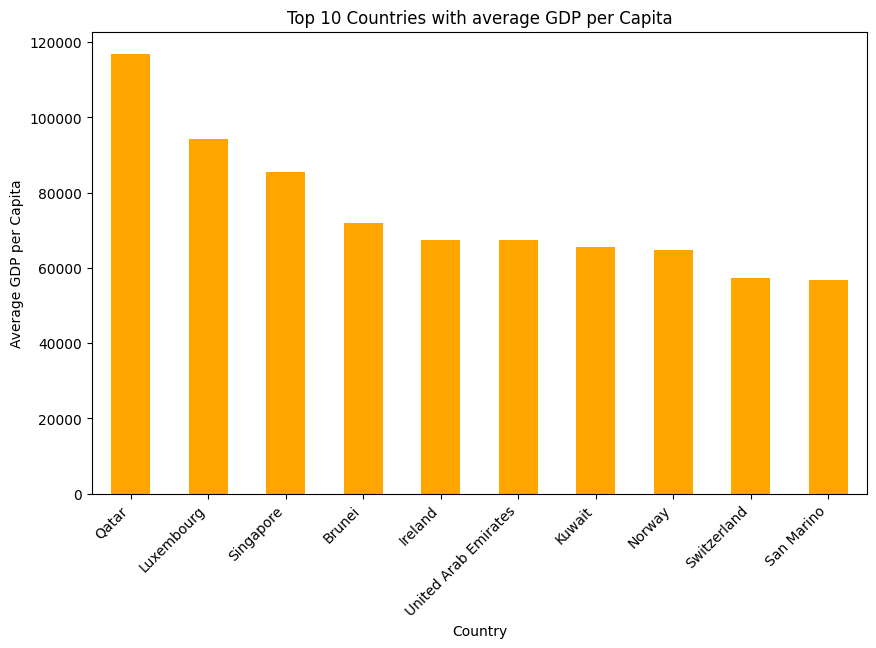

In [ ]:
plt.figure(figsize=(10, 6))
data.groupby('location')['gdp_per_capita'].mean().nlargest(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries with average GDP per Capita')
plt.xlabel('Country')
plt.ylabel('Average GDP per Capita')
plt.xticks(rotation=45, ha='right')
plt.show()

# Question 11: Use statistical analysis to compare the COVID-19 situation among different countries based on total cases and show their correlation using correlation matrix.

In [ ]:
#Displaying descriptive statistics for selected countries
descriptive_stats = data.groupby('location')['total_cases'].describe()
descriptive_stats

count          mean           std   min      25%      50%  \
location                                                                 
Afghanistan  294.0  17436.846939  17246.787050   0.0     4.75  10877.5   
Albania      225.0   4764.226667   4996.860554   2.0   795.00   2402.0   
Algeria      294.0  30610.864053  25102.257936   1.0  6300.25  27060.5   
Andorra      226.0   2747.308178  10523.890681   1.0   752.50    855.0   
Angola       212.0   1433.985849   1935.163957   2.0    45.00    346.0   
...            ...           ...           ...   ...      ...      ...   
Venezuela    219.0  22402.069747  28264.728971  10.0   384.50   6273.0   
Vietnam      294.0   6723.665618  19339.293481   2.0   257.25    349.0   
Yemen        193.0   1186.139896    806.605927   1.0   255.00   1502.0   
Zambia       215.0   5255.409302   5787.724798   2.0   267.00   1632.0   
Zimbabwe     213.0   2787.319249   3184.409283   1.0    37.00    698.0   

                  75%           max  
location                             
Afghanistan  36926.75  40200.000000  
Albania       8427.00  17055.000000  
Algeria      52489.75  66219.274702  
Andorra       1124.00  66219.274702  
Angola        2352.75   7462.000000  
...               ...           ...  
Venezuela    41158.00  86636.000000  
Vietnam       1046.00  66219.274702  
Yemen         1958.00   2059.000000  
Zambia       11330.50  15853.000000  
Zimbabwe      6251.00   8147.000000  

[210 rows x 8 columns]

# Question 12: Show the correlation among the columns.

<ipython-input-31-e3e597184e20>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


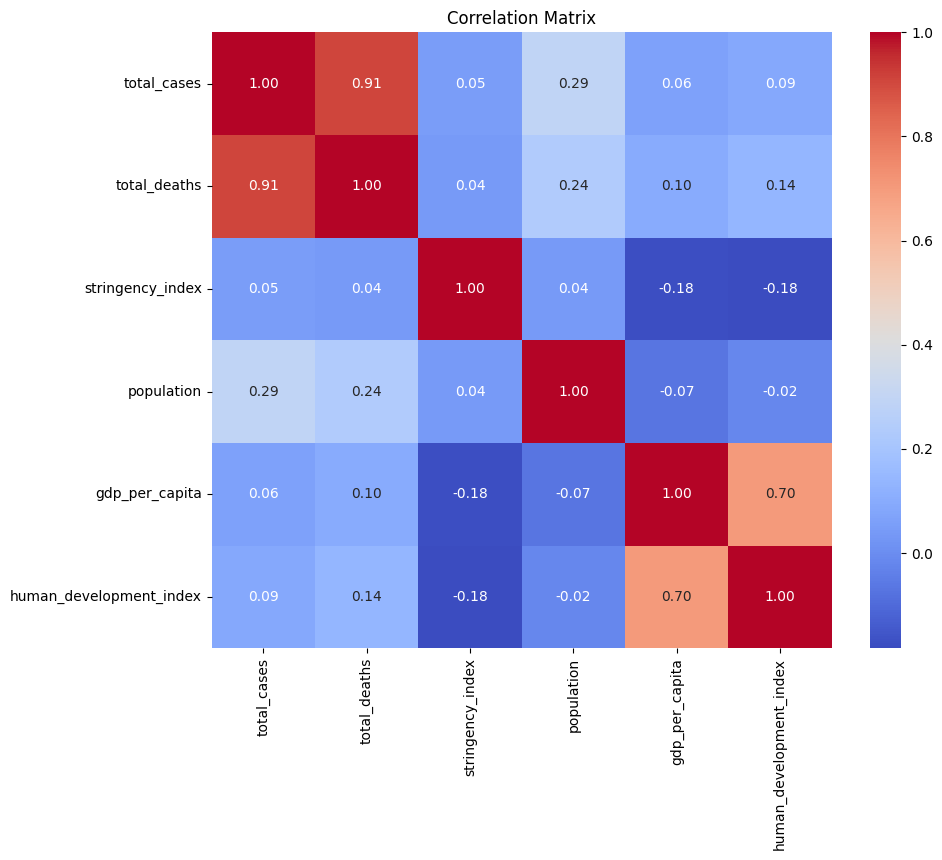

In [ ]:
#Calculating correlation matrix
correlation_matrix = data.corr()

#Displaying heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()